In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

## Internet Advertisements Dataset

In [54]:
ad_df = pd.read_csv("add.csv", index_col="Unnamed: 0")

<ipython-input-54-8b947b9d5288>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  ad_df = pd.read_csv("add.csv", index_col="Unnamed: 0")


In [55]:
for col in ad_df.columns[:-1]:
  ad_df[col] = pd.to_numeric(ad_df[col], errors="coerce")

In [56]:
ad_df

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170.0,94.0,0.5529,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101.0,140.0,1.3861,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23.0,120.0,5.2173,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,NaN,NaN,NaN,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [57]:
ad_df.isna().sum()

0       903
1       901
2       910
3        15
4         0
       ... 
1554      0
1555      0
1556      0
1557      0
1558      0
Length: 1559, dtype: int64

### Renaming Columns

In [58]:
cols = []
with open("ad.names", encoding="ISO-8859-1") as _f:
  for line in _f.readlines():
    colname = line.split(":")[0].strip()
    cols.append(colname)

cols

['height',
 'width',
 'aratio',
 'local',
 'url*images+buttons',
 'url*likesbooks.com',
 'url*www.slake.com',
 'url*hydrogeologist',
 'url*oso',
 'url*media',
 'url*peace+images',
 'url*blipverts',
 'url*tkaine+kats',
 'url*labyrinth',
 'url*advertising+blipverts',
 'url*images+oso',
 'url*area51+corridor',
 'url*ran+gifs',
 'url*express-scripts.com',
 'url*off',
 'url*cnet',
 'url*time+1998',
 'url*josefina3',
 'url*truluck.com',
 'url*clawnext+gif',
 'url*autopen.com',
 'url*tvgen.com',
 'url*pixs',
 'url*heartland+5309',
 'url*meadows+9196',
 'url*blue',
 'url*ad+gif',
 'url*area51',
 'url*www.internauts.ca',
 'url*afn.org',
 'url*ran.org',
 'url*shareware.com',
 'url*baons+images',
 'url*area51+labyrinth',
 'url*pics',
 'url*image+navigate',
 'url*pool+images',
 'url*carousel.org',
 'url*members.accessus.net',
 'url*cmp+flowsoft010',
 'url*smallb+gif',
 'url*www.FlowSoft.com',
 'url*kandinsky',
 'url*csuhayward.edu',
 'url*www.yahoo.co.uk',
 'url*ibitexas.com',
 'url*www.haestad.co

In [59]:
cols.append("class")

In [60]:
ad_df.rename(
    columns=dict(
        zip(
            [str(i) for i in range(ad_df.shape[1])]
            , cols
            )
        ),
        inplace=True
    )

In [61]:
ad_df.columns

Index(['height', 'width', 'aratio', 'local', 'url*images+buttons',
       'url*likesbooks.com', 'url*www.slake.com', 'url*hydrogeologist',
       'url*oso', 'url*media',
       ...
       'caption*home', 'caption*my', 'caption*your', 'caption*in',
       'caption*bytes', 'caption*here', 'caption*click', 'caption*for',
       'caption*you', 'class'],
      dtype='object', length=1559)

### Data Preprocessing

In [62]:
ad_df.head()

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,class
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [72]:
ad_df["class"].unique()

array(['ad.', 'nonad.'], dtype=object)

In [63]:
ad_df["height"].fillna(ad_df["height"].mean(), inplace=True)
ad_df["width"].fillna(ad_df["width"].mean(), inplace=True)
ad_df["aratio"].fillna(ad_df["aratio"].mean(), inplace=True)
ad_df["local"].fillna(1.0, inplace=True)

In [64]:
ad_df.isna().sum()

height                0
width                 0
aratio                0
local                 0
url*images+buttons    0
                     ..
caption*here          0
caption*click         0
caption*for           0
caption*you           0
class                 0
Length: 1559, dtype: int64

In [65]:
ad_X = ad_df.drop(columns=["class"])
ad_Y = ad_df["class"]

In [66]:
ad_X_train, ad_X_test, ad_Y_train, ad_Y_test = train_test_split(
    ad_X, ad_Y, test_size=0.2
)

### Model Implementation

In [68]:
model = DecisionTreeClassifier()
model.fit(ad_X_train, ad_Y_train)

print(f"Decision Tree: {model.score(ad_X_test, ad_Y_test)}")

Decision Tree: 0.9710365853658537


In [69]:
model = GaussianNB()
model.fit(ad_X_train, ad_Y_train)

print(f"Naive Bayes: {model.score(ad_X_test, ad_Y_test)}")

Naive Bayes: 0.7865853658536586


In [70]:
model = KNeighborsClassifier()
model.fit(ad_X_train, ad_Y_train)

print(f"KNN: {model.score(ad_X_test, ad_Y_test)}")

KNN: 0.9634146341463414


In [71]:
model = SVC()
model.fit(ad_X_train, ad_Y_train)

print(f"SVM: {model.score(ad_X_test, ad_Y_test)}")

SVM: 0.926829268292683


### Visualization

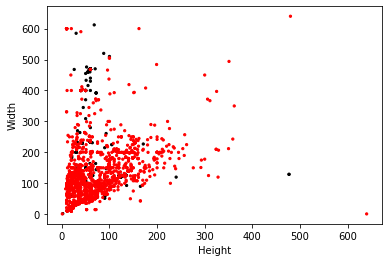

In [123]:
plt.scatter(ad_df["height"], ad_df["width"], color=ad_df["class"].map({
    "ad." : "black",
    "nonad." : "red"
    }), s=5)

plt.xlabel("Height")
plt.ylabel("Width")

plt.show()

## Healthcare Dataset

In [118]:
hc_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

hc_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [119]:
hc_df["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### Data Preprocessing

In [102]:
hc_df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [103]:
hc_df.shape

(5110, 12)

In [104]:
hc_df["bmi"].fillna(hc_df["bmi"].mean(), inplace=True)

In [105]:
hc_df.drop(columns=["id"], inplace=True)

In [106]:
encoders = {}
for col in hc_df.columns:
  if hc_df[col].dtype.__str__() == "object":
    encoders[col] = LabelEncoder()
    hc_df[col] = encoders[col].fit_transform(hc_df[col])

In [107]:
hc_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [108]:
hc_X = hc_df.drop(columns=["stroke"])
hc_Y = hc_df["stroke"]

In [109]:
hc_X_train, hc_X_test, hc_Y_train, hc_Y_test = train_test_split(
    hc_X, hc_Y, test_size=0.2
)

### Model Implementation

In [110]:
model = DecisionTreeClassifier()
model.fit(hc_X_train, hc_Y_train)

print(f"Decision Tree: {model.score(hc_X_test, hc_Y_test)}")

Decision Tree: 0.9031311154598826


In [111]:
model = GaussianNB()
model.fit(hc_X_train, hc_Y_train)

print(f"Naive Bayes: {model.score(hc_X_test, hc_Y_test)}")

Naive Bayes: 0.87279843444227


In [112]:
model = KNeighborsClassifier()
model.fit(hc_X_train, hc_Y_train)

print(f"KNN: {model.score(hc_X_test, hc_Y_test)}")

KNN: 0.952054794520548


In [113]:
model = SVC()
model.fit(hc_X_train, hc_Y_train)

print(f"SVM: {model.score(hc_X_test, hc_Y_test)}")

SVM: 0.9569471624266145


### Visualization

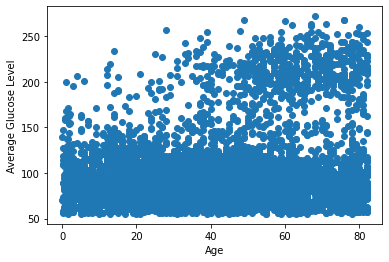

In [133]:
hc_df = pd.read_csv("healthcare-dataset-stroke-data.csv")
plt.scatter(
    hc_df["age"], hc_df["avg_glucose_level"]
)
plt.xlabel("Age")
plt.ylabel("Average Glucose Level")

plt.show()